# Projet 5 - Optimisez la gestion des données d'une boutique avec Python

In [1]:
#import des librairies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import re

In [2]:
df_erp = pd.read_excel('erp.xlsx')
df_liaison = pd.read_excel('liaison.xlsx')
df_web = pd.read_excel('web.xlsx')

C:\Users\loica\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\loica\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\loica\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# 1 - Nettoyer le jeu de données

In [3]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
#Nombre de colonnes et de lignes
df_erp.shape

(825, 5)

In [5]:
df_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [6]:
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [7]:
df_erp["onsale_web"] = df_erp["onsale_web"].astype(float)

In [8]:
df_erp["stock_quantity"] = df_erp["stock_quantity"].astype(float)

In [9]:
df_erp.dtypes

product_id          int64
onsale_web        float64
price             float64
stock_quantity    float64
stock_status       object
dtype: object

In [10]:
#Vérifier les NAN
df_erp.isnull()

,product_id,onsale_web,price,stock_quantity,stock_status
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
820,False,False,False,False,False
821,False,False,False,False,False
822,False,False,False,False,False
823,False,False,False,False,False


In [11]:
#Vérifier les données dupliquer
df_erp.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Length: 825, dtype: bool

In [12]:
df_erp.shape

(825, 5)

In [13]:
df_erp.dtypes

product_id          int64
onsale_web        float64
price             float64
stock_quantity    float64
stock_status       object
dtype: object

In [14]:
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [15]:
#Renommer colonne id_web en SKU
df_liaison.rename(columns = {'id_web': 'sku'}, inplace=True)

In [16]:
#Supprimer les NAN
df_liaison.isnull()

,product_id,sku
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
820,False,True
821,False,True
822,False,False
823,False,False


In [17]:
#Supprimer les NAN
df_liaison.dropna(inplace = True)

In [18]:
#Supprimer les NAN
df_liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


In [19]:
df_liaison.tail()

,product_id,sku
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1
824,7338,16230


In [20]:
df_liaison.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
792    False
793    False
822    False
823    False
824    False
Length: 734, dtype: bool

In [21]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [22]:
df_web.shape

(1513, 28)

In [23]:
#Supprimer des colonnes
df_web.drop(columns = ['virtual', 'tax_status','comment_count','downloadable','rating_count','average_rating','tax_class','menu_order','post_content_filtered','post_date','post_content','post_password','post_modified_gmt','post_parent'], inplace = True)



In [24]:
df_web.isnull().sum()

sku                85
total_sales        83
post_author        83
post_date_gmt      83
post_title         83
post_excerpt      797
post_status        83
comment_status     83
ping_status        83
post_name          83
post_modified      83
guid               83
post_type          83
post_mime_type    799
dtype: int64

In [25]:
#Vérifier les valeurs manquantes
df_web.isnull()

,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,guid,post_type,post_mime_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1509,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1510,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1511,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [26]:
#Vérifier les données dupliquer
df_web.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1508    False
1509    False
1510    False
1511    False
1512    False
Length: 1513, dtype: bool

In [27]:
#Supprimer les lignes NAN
df_web.dropna(how='all', inplace = True)

In [28]:
#Suppression des doublons sku a cause de la colonne post_type
df_web.drop(df_web.loc[df_web['post_type']=='attachment'].index, inplace=True)

In [29]:
df_web.shape

(716, 14)

In [30]:
df_web.head()

,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,guid,post_type,post_mime_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1,15298,6.0,2.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
2,15296,0.0,2.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,15300,0.0,2.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,19814,3.0,2.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


# 2 - Jointure des tables

In [31]:
#Jointure entre 2 tables
df_erp_liaison = pd.merge(df_erp, df_liaison, on="product_id",how='outer')
df_erp_liaison.head() 

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1.0,24.2,0.0,outofstock,15298
1,3849,1.0,34.3,0.0,outofstock,15296
2,3850,1.0,20.8,0.0,outofstock,15300
3,4032,1.0,14.1,0.0,outofstock,19814
4,4039,1.0,46.0,0.0,outofstock,19815


In [32]:
df_erp_liaison.shape

(825, 6)

In [33]:
#Remplacer les Nan par des 0
df_erp_liaison['sku'].fillna(0, inplace = True)

In [34]:
df_erp_liaison.isnull()

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
820,False,False,False,False,False,False
821,False,False,False,False,False,False
822,False,False,False,False,False,False
823,False,False,False,False,False,False


In [35]:
#Jointure entre 2 tables
df_erp_liaison_web = pd.merge(df_erp_liaison, df_web, on="sku",how='left')
df_erp_liaison_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,guid,post_type,post_mime_type
0,3847,1.0,24.2,0.0,outofstock,15298,6.0,2.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1,3849,1.0,34.3,0.0,outofstock,15296,0.0,2.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
2,3850,1.0,20.8,0.0,outofstock,15300,0.0,2.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,4032,1.0,14.1,0.0,outofstock,19814,3.0,2.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,4039,1.0,46.0,0.0,outofstock,19815,0.0,2.0,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [36]:
df_erp_liaison_web.shape

(825, 19)

In [37]:
df_erp_liaison_web.isnull()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,guid,post_type,post_mime_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
821,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
822,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
823,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True


In [38]:
#Création d'une colonne pour calculer les ventes totales magasin + web  
df_erp_liaison_web["Vente_web+mag"] = df_erp_liaison_web["onsale_web"]+df_erp_liaison_web["total_sales"]
df_erp_liaison_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,guid,post_type,post_mime_type,Vente_web+mag
0,3847,1.0,24.2,0.0,outofstock,15298,6.0,2.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,7.0
1,3849,1.0,34.3,0.0,outofstock,15296,0.0,2.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0
2,3850,1.0,20.8,0.0,outofstock,15300,0.0,2.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0
3,4032,1.0,14.1,0.0,outofstock,19814,3.0,2.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,4.0
4,4039,1.0,46.0,0.0,outofstock,19815,0.0,2.0,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7203,0.0,45.0,30.0,instock,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
821,7204,0.0,45.0,9.0,instock,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
822,7247,1.0,54.8,23.0,instock,13127-1,0.0,2.0,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0
823,7329,0.0,26.5,14.0,instock,14680-1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [39]:
#Création d'une colonne pour calculer le CA/produit 
df_erp_liaison_web["CA/produit"] = df_erp_liaison_web["Vente_web+mag"]*df_erp_liaison_web["price"]
df_erp_liaison_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,...,post_status,comment_status,ping_status,post_name,post_modified,guid,post_type,post_mime_type,Vente_web+mag,CA/produit
0,3847,1.0,24.2,0.0,outofstock,15298,6.0,2.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,...,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,7.0,169.4
1,3849,1.0,34.3,0.0,outofstock,15296,0.0,2.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,34.3
2,3850,1.0,20.8,0.0,outofstock,15300,0.0,2.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,...,publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,20.8
3,4032,1.0,14.1,0.0,outofstock,19814,3.0,2.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,4.0,56.4
4,4039,1.0,46.0,0.0,outofstock,19815,0.0,2.0,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7203,0.0,45.0,30.0,instock,0,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
821,7204,0.0,45.0,9.0,instock,0,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
822,7247,1.0,54.8,23.0,instock,13127-1,0.0,2.0,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,...,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,54.8
823,7329,0.0,26.5,14.0,instock,14680-1,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [40]:
df_erp_liaison_web.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'sku', 'total_sales', 'post_author', 'post_date_gmt', 'post_title',
       'post_excerpt', 'post_status', 'comment_status', 'ping_status',
       'post_name', 'post_modified', 'guid', 'post_type', 'post_mime_type',
       'Vente_web+mag', 'CA/produit'],
      dtype='object')

In [41]:
df_erp_liaison_web.reindex(columns = ["product_id",'sku', 'onsale_web','total_sales','Vente_web+mag','price', 'CA/produit','stock_quantity', 'stock_status','post_author', 'post_date_gmt', 'post_title','post_excerpt', 'post_status', 'comment_status', 'ping_status','post_name', 'post_modified', 'guid', 'post_type', 'post_mime_type'])


,product_id,sku,onsale_web,total_sales,Vente_web+mag,price,CA/produit,stock_quantity,stock_status,post_author,...,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,guid,post_type,post_mime_type
0,3847,15298,1.0,6.0,7.0,24.2,169.4,0.0,outofstock,2.0,...,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1,3849,15296,1.0,0.0,1.0,34.3,34.3,0.0,outofstock,2.0,...,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
2,3850,15300,1.0,0.0,1.0,20.8,20.8,0.0,outofstock,2.0,...,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,4032,19814,1.0,3.0,4.0,14.1,56.4,0.0,outofstock,2.0,...,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,4039,19815,1.0,0.0,1.0,46.0,46.0,0.0,outofstock,2.0,...,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7203,0,0.0,NaN,NaN,45.0,NaN,30.0,instock,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
821,7204,0,0.0,NaN,NaN,45.0,NaN,9.0,instock,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
822,7247,13127-1,1.0,0.0,1.0,54.8,54.8,23.0,instock,2.0,...,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
823,7329,14680-1,0.0,NaN,NaN,26.5,NaN,14.0,instock,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [42]:
df_erp_liaison_web['Vente_web+mag'].fillna(0, inplace = True)

In [43]:
df_erp_liaison_web['total_sales'].fillna(0, inplace = True)

In [44]:
df_erp_liaison_web.drop(df_erp_liaison_web.loc[df_erp_liaison_web['Vente_web+mag']==0].index, inplace=True)

In [45]:
#Calcul du CA total 
CA = df_erp_liaison_web["CA/produit"].sum()
print(CA)

93768.7


# 3 - Recherche des outliers

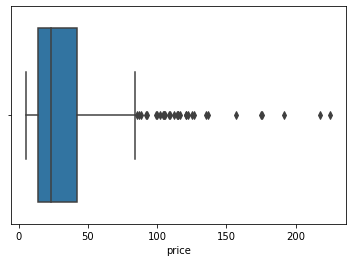

In [46]:
sns.boxplot(x='price', data=df_erp_liaison_web) 
plt.title = ('Répartiton des prix et visualisation des outliers')


In [47]:
df_erp_liaison_web.describe()

,product_id,onsale_web,price,stock_quantity,total_sales,post_author,Vente_web+mag,CA/produit
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,5032.557423,1.0,32.493137,28.746499,4.012605,1.998599,5.012605,131.328711
std,790.510878,0.0,27.810525,48.012608,8.518183,0.037424,8.518183,313.130451
min,3847.000000,1.0,5.200000,0.000000,0.000000,1.000000,1.000000,5.200000
25%,4280.250000,1.0,14.100000,2.000000,0.000000,2.000000,1.000000,28.425000
50%,4796.000000,1.0,23.550000,12.000000,1.000000,2.000000,2.000000,57.650000
75%,5710.500000,1.0,42.175000,35.000000,4.000000,2.000000,5.000000,121.375000
max,7338.000000,1.0,225.000000,578.000000,96.000000,2.000000,97.000000,4753.000000


In [48]:
#On calcule Q1
Q1 = df_erp_liaison_web.price.quantile(0.25)
#On calcule la médiane
Mediane = df_erp_liaison_web.price.quantile(0.50)
#On calcule Q3
Q3 = df_erp_liaison_web.price.quantile(0.75)
Q1, Mediane, Q3

(14.1, 23.55, 42.175000000000004)

In [49]:
#On calcule l'écart interquartile (IQR)
IQR = Q3 - Q1
IQR

28.075000000000003

In [50]:
#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
borne_inf = max(Q1-1.5*IQR,0)
#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = Q3 +1.5*IQR
borne_inf,borne_sup

(0, 84.28750000000001)

In [59]:
#Position des outlier
print(np.where(df_erp_liaison_web['price']>84.28))

(array([ 63,  65, 199, 201, 205, 218, 219, 221, 222, 227, 380, 381, 426,
       431, 432, 437, 438, 502, 511, 553, 587, 602, 603, 604, 642, 647,
       648, 653, 654, 655, 656, 657], dtype=int64),)


In [52]:
#On affiche les lignes des outliers
df_erp_liaison_web.iloc[[63,  65, 199, 201, 205, 218, 219, 221, 222, 227, 380, 381, 426,
       431, 432, 437, 438, 502, 506, 511, 553, 587, 602, 603, 604, 642,
       647, 648, 653, 654, 655, 656, 657],:]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,...,post_status,comment_status,ping_status,post_name,post_modified,guid,post_type,post_mime_type,Vente_web+mag,CA/produit
66,4115,1.0,100.0,11.0,instock,15382,0.0,2.0,2018-02-13 10:08:45,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,...,publish,closed,closed,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,100.0
68,4132,1.0,88.4,5.0,instock,11668,0.0,2.0,2018-02-13 10:43:55,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,...,publish,closed,closed,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,88.4
208,4352,1.0,225.0,0.0,outofstock,15940,5.0,2.0,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,...,publish,closed,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,6.0,1350.0
210,4355,1.0,126.5,2.0,instock,12589,11.0,2.0,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,...,publish,closed,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,12.0,1518.0
214,4359,1.0,85.6,0.0,outofstock,13853,1.0,2.0,2018-03-02 10:11:48,Champagne Larmandier-Bernier Grand Cru Les Che...,...,publish,closed,closed,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,2.0,171.2
227,4402,1.0,176.0,8.0,instock,3510,13.0,2.0,2018-03-22 10:21:05,Cognac Frapin VIP XO,...,publish,closed,closed,cognac-frapin-vip-xo,2020-08-22 11:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,14.0,2464.0
228,4404,1.0,108.5,2.0,instock,3507,2.0,2.0,2018-03-22 10:32:55,Cognac Frapin Château de Fontpinot XO,...,publish,closed,closed,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,3.0,325.5
230,4406,1.0,157.0,3.0,instock,7819,0.0,2.0,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,...,publish,closed,closed,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,157.0
231,4407,1.0,104.0,6.0,instock,3509,1.0,2.0,2018-03-22 10:49:53,Cognac Frapin Cigar Blend,...,publish,closed,closed,cognac-frapin-cigar-blend,2020-07-04 09:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,2.0,208.0
240,4582,1.0,109.6,7.0,instock,12857,0.0,2.0,2018-04-12 15:56:13,Château de Meursault Puligny-Montrachet 1er Cr...,...,publish,closed,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,109.6


In [53]:
# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_erp_liaison_web['price']))
print(z)

0      0.298410
1      0.065016
2      0.420752
3      0.661837
4      0.486015
         ...   
787    0.866939
792    0.179667
793    1.313620
822    0.802664
824    0.582675
Name: price, Length: 714, dtype: float64


In [54]:
threshold = 3
 
# Position des outlier
print(np.where(z > 3))

(array([199, 201, 218, 221, 381, 426, 511, 553, 587, 603, 642, 648, 654,
       657], dtype=int64),)


In [55]:
#On affiche les lignes des outliers
df_erp_liaison_web.iloc[[199, 201, 218, 221, 381, 426, 511, 553, 587, 603, 642, 648, 654,657],:]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,...,post_status,comment_status,ping_status,post_name,post_modified,guid,post_type,post_mime_type,Vente_web+mag,CA/produit
208,4352,1.0,225.0,0.0,outofstock,15940,5.0,2.0,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,...,publish,closed,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,6.0,1350.0
210,4355,1.0,126.5,2.0,instock,12589,11.0,2.0,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,...,publish,closed,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,12.0,1518.0
227,4402,1.0,176.0,8.0,instock,3510,13.0,2.0,2018-03-22 10:21:05,Cognac Frapin VIP XO,...,publish,closed,closed,cognac-frapin-vip-xo,2020-08-22 11:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,14.0,2464.0
230,4406,1.0,157.0,3.0,instock,7819,0.0,2.0,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,...,publish,closed,closed,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,157.0
411,4904,1.0,137.0,13.0,instock,14220,5.0,2.0,2018-05-15 08:23:41,Domaine Des Croix Corton Charlemagne Grand Cru...,...,publish,closed,closed,domaine-des-croix-corton-charlemagne-grand-cru...,2020-05-19 17:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,6.0,822.0
460,5001,1.0,217.5,20.0,instock,14581,0.0,2.0,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,...,publish,closed,closed,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,217.5
556,5612,1.0,124.8,12.0,instock,14915,0.0,2.0,2019-01-15 14:30:49,Domaine Weinbach Gewurztraminer Grand Cru Furs...,...,publish,closed,closed,domaine-weinbach-gewurztraminer-gc-furstentum-...,2019-01-23 09:33:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,124.8
598,5767,1.0,175.0,12.0,instock,15185,0.0,2.0,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,...,publish,closed,closed,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,175.0
635,5892,1.0,191.3,10.0,instock,14983,3.0,2.0,2019-03-28 09:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,...,publish,closed,closed,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,4.0,765.2
651,5917,1.0,122.0,4.0,instock,14775,0.0,2.0,2019-04-04 14:49:37,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,...,publish,closed,closed,wemyss-malts-single-cask-scotch-whisky-choc-n-...,2020-03-11 09:30:09,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,122.0


In [56]:
df_erp_liaison_web["z_score"] = np.abs(stats.zscore(df_erp_liaison_web['price']))
df_erp_liaison_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,...,comment_status,ping_status,post_name,post_modified,guid,post_type,post_mime_type,Vente_web+mag,CA/produit,z_score
0,3847,1.0,24.2,0.0,outofstock,15298,6.0,2.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,7.0,169.4,0.298410
1,3849,1.0,34.3,0.0,outofstock,15296,0.0,2.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,34.3,0.065016
2,3850,1.0,20.8,0.0,outofstock,15300,0.0,2.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,20.8,0.420752
3,4032,1.0,14.1,0.0,outofstock,19814,3.0,2.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,4.0,56.4,0.661837
4,4039,1.0,46.0,0.0,outofstock,19815,0.0,2.0,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,46.0,0.486015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,6930,1.0,8.4,83.0,instock,16135,5.0,2.0,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,...,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,6.0,50.4,0.866939
792,7023,1.0,27.5,15.0,instock,15891,0.0,2.0,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,...,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,27.5,0.179667
793,7025,1.0,69.0,2.0,instock,15887,0.0,2.0,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,...,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,69.0,1.313620
822,7247,1.0,54.8,23.0,instock,13127-1,0.0,2.0,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,...,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1.0,54.8,0.802664


<AxesSubplot:xlabel='Vente_web+mag', ylabel='Count'>

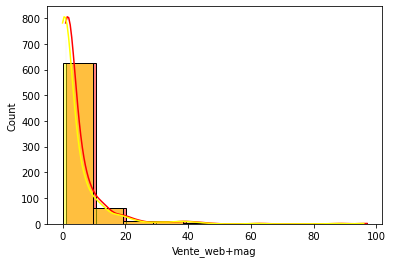

In [58]:
#Warning a l'utilisation de distplot
sns.histplot(df_erp_liaison_web['Vente_web+mag'],kde = True, color ='red', bins = 10)
sns.histplot(df_erp_liaison_web['total_sales'],kde = True, color ='yellow', bins = 10)
sns.histplot(df_erp_liaison_web['onsale_web'],kde = True, color ='blue', bins = 10)
